In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
sns.set_style('darkgrid')

In [2]:
from npd_load.load import load

# Drilling Results: Current year

In [3]:
link_key = 'well_explCurrent'
df = load(link_key)

In [4]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbDrillingOperator').size()).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbContent').size()).sum(), 0))
    return a

In [5]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False)
data1 = df.groupby('wlbContent', dropna=False).size()

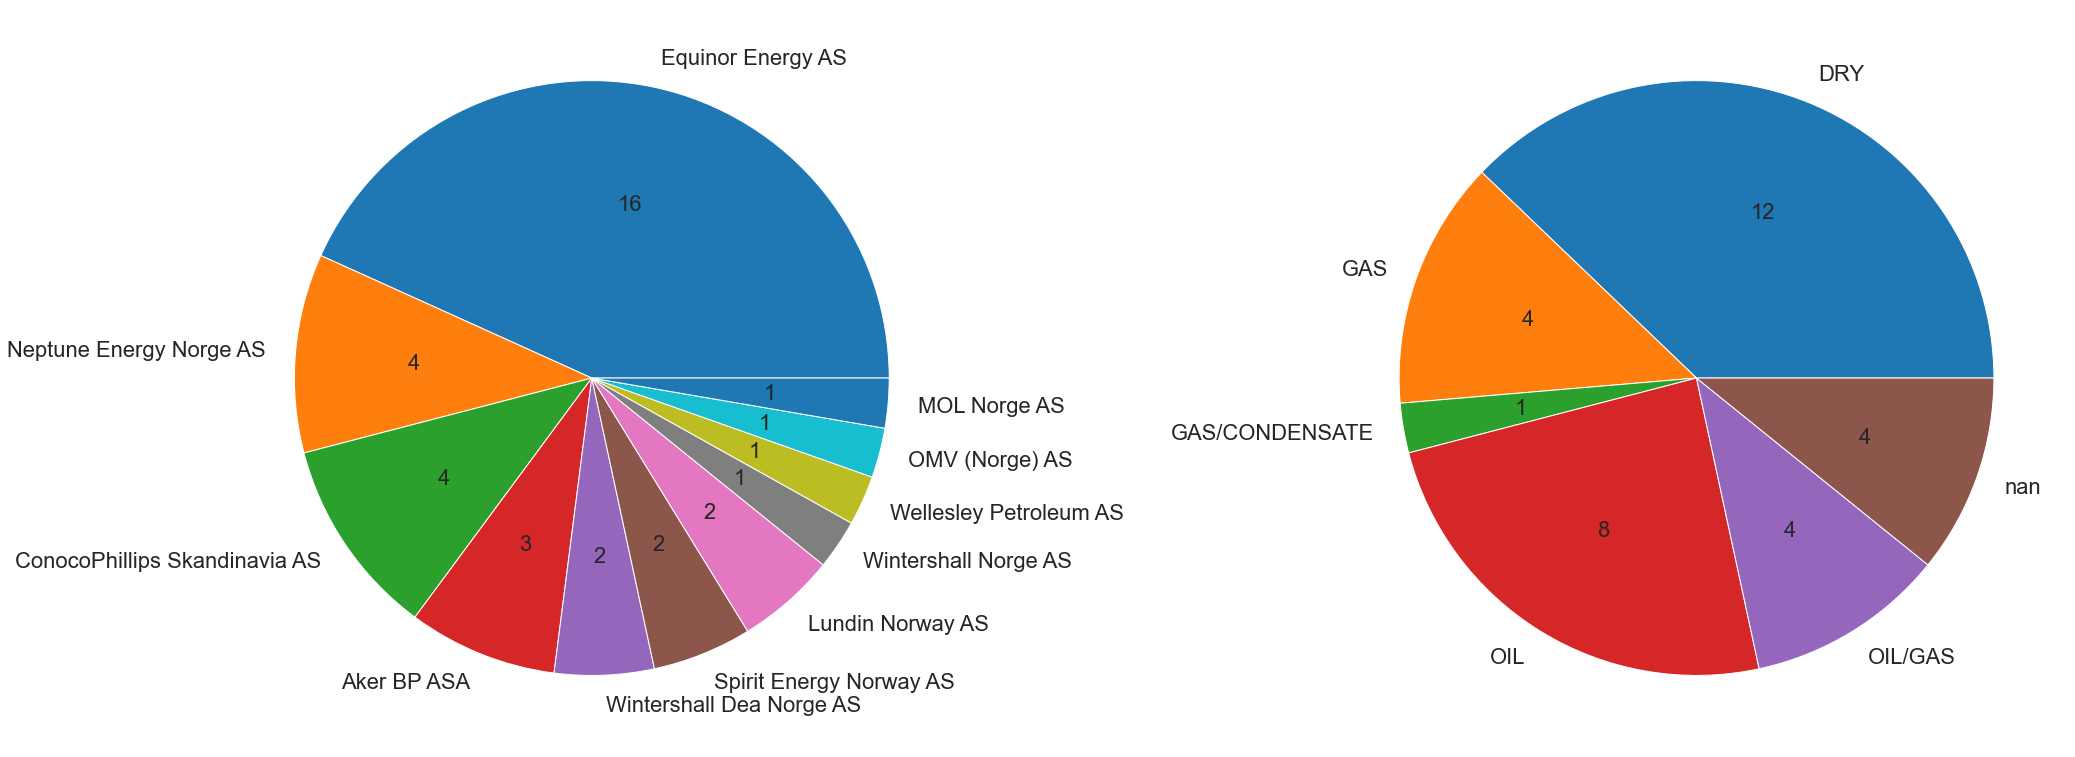

In [6]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 22})
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 22})
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_current.png")
plt.show()

# Drilling Results: Previous 10 years

In [100]:
link_key = 'well_expl10years'
df = load(link_key)

In [114]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbContent').size()).sum(), 0))
    return a

In [115]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

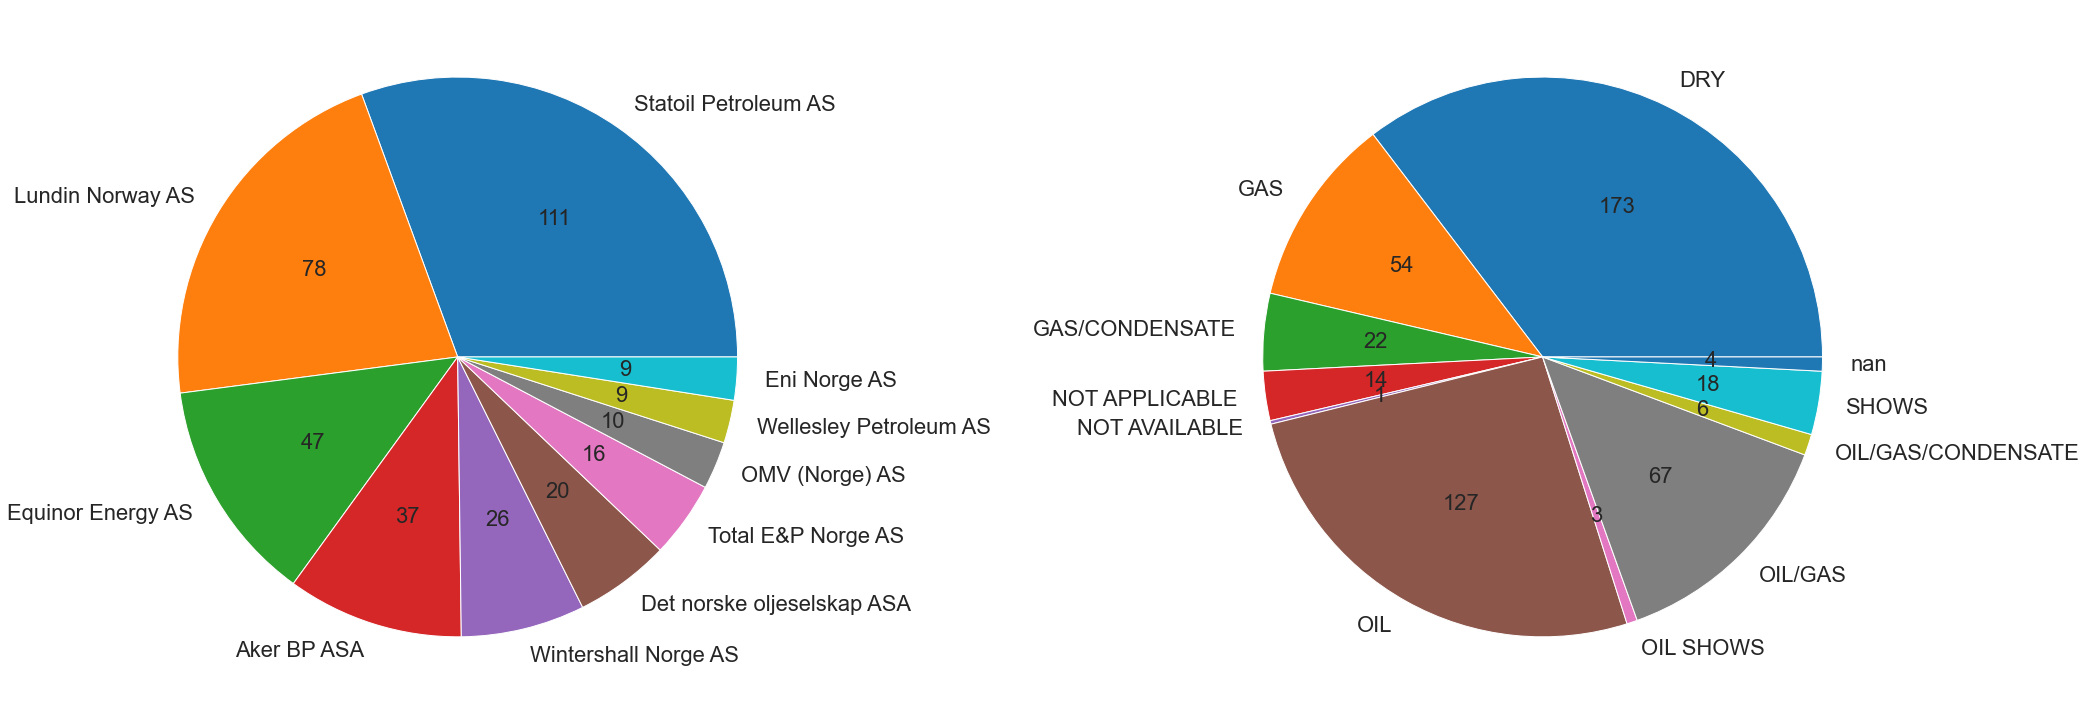

In [116]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 22})
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 22})
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_10.png")
plt.show()

# Drilling Results: All

In [117]:
link_key = 'well_allLong'
df = load(link_key)

time data '0' does not match format '%Y' (match)
time data '0' does not match format '%Y' (match)


In [118]:
data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False).head(10)
data1 = df.groupby('wlbContent', dropna=False).size()

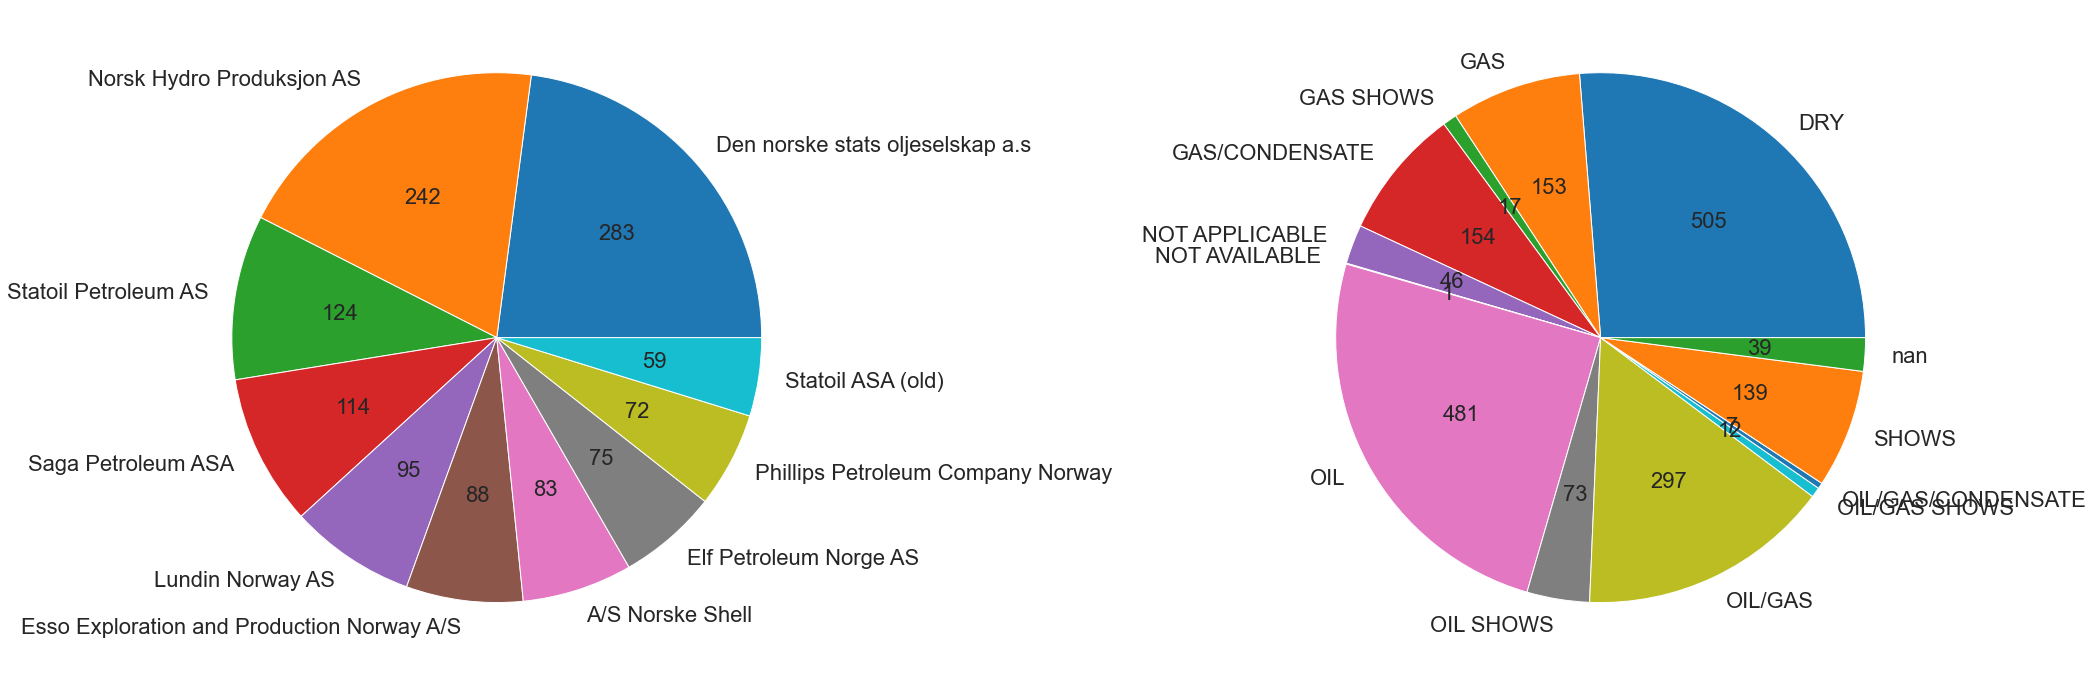

In [119]:
fig, ax = plt.subplots(1,2, figsize=(30,15))
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 22})
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 22})
fig.tight_layout(pad=5.0)
plt.savefig("./figures/drilling_all.png")
plt.show()

In [13]:
df = df.set_index('wlbEntryDate')
df['well_count'] = 1
wellcount_year = df['well_count'].resample('Y').sum()
wellcount_year.index = wellcount_year.index.strftime('%Y')

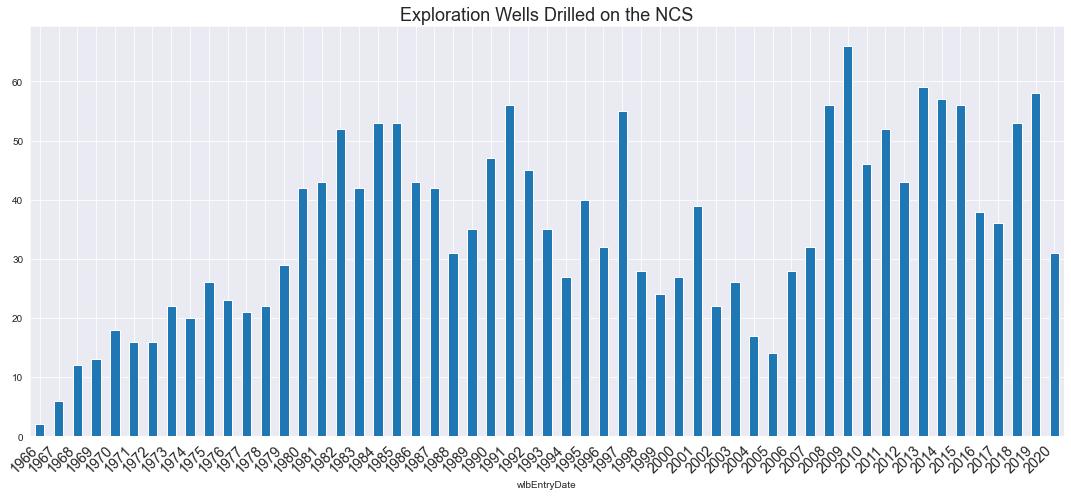

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
wellcount_year.plot(ax=ax, kind='bar')
plt.title('Exploration Wells Drilled on the NCS', fontsize=18)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.tight_layout()
plt.savefig("./figures/expl_yearly_drill.png")
plt.show()

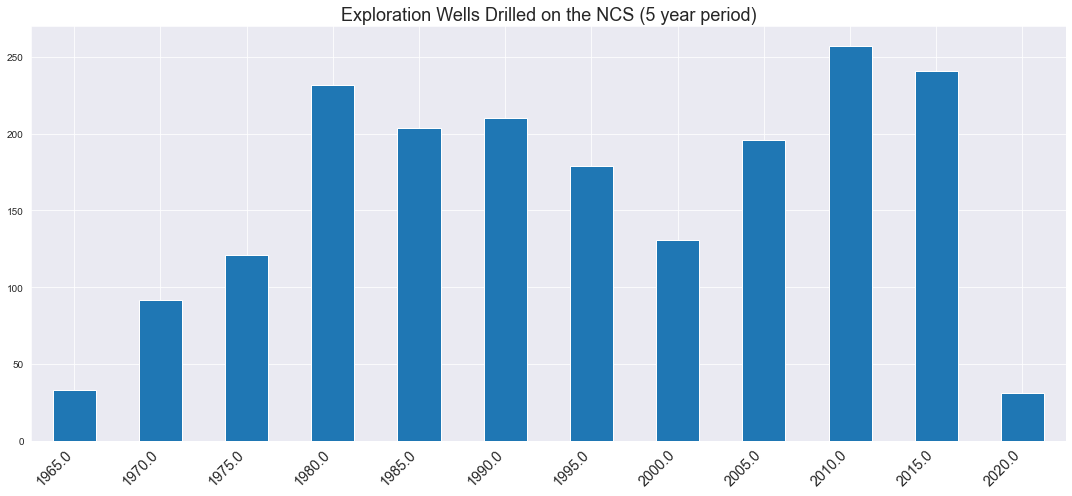

In [15]:
data = df.groupby(lambda x: (x.year//5)*5).count()['wlbWellboreName']
data.plot(kind='bar', figsize=(15,7), title='Wells drilled per 5 year period')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Exploration Wells Drilled on the NCS (5 year period)', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/expl_5yearly_drill.png")
plt.show()

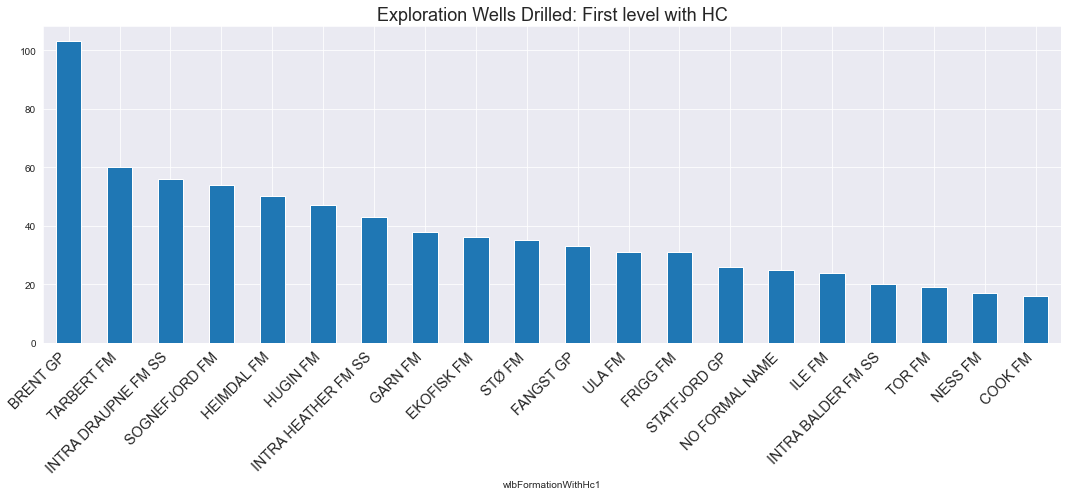

In [16]:
data = df.groupby('wlbFormationWithHc1').size().sort_values(ascending=False).head(20)
data.plot(kind='bar', figsize=(15,7), title='First Level with HC')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Exploration Wells Drilled: First level with HC', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/first_level_hc.png")
plt.show()

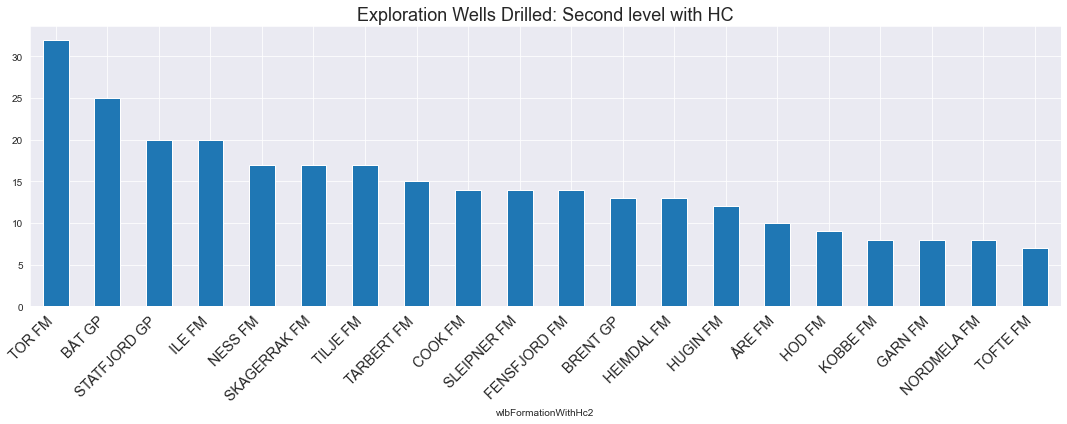

In [17]:
data = df.groupby('wlbFormationWithHc2').size().sort_values(ascending=False).head(20)
data.plot(kind='bar', figsize=(15,6), title='Second Level with HC')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Exploration Wells Drilled: Second level with HC', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/second_level_hc.png")
plt.show()

# Discovery: Overview

In [18]:
link_key = 'disc_overview'
df = load(link_key)

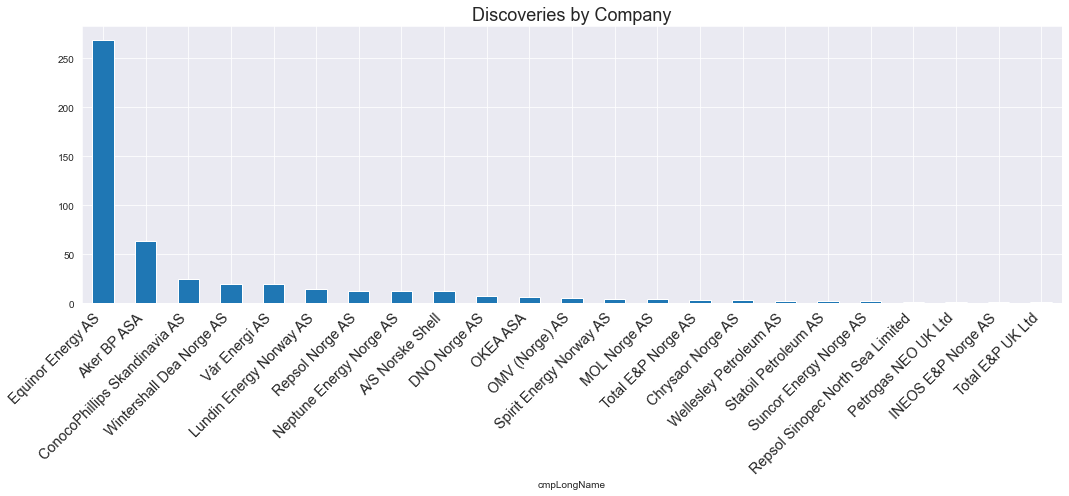

In [19]:
data = df.groupby('cmpLongName').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(15,7), title='Company Discoveries')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discoveries by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_ov.png")
plt.show()

In [20]:
def absolute_value(val):
    a  = int(np.round(val/100.*(df.groupby('dscHcType').size()).sum(), 0))
    return a

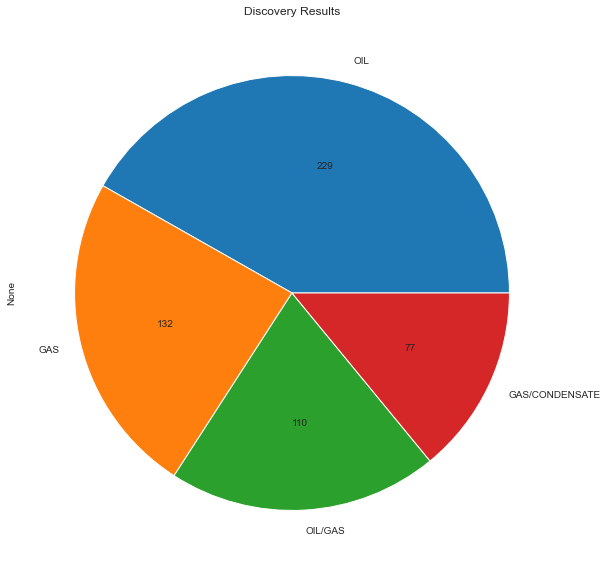

In [21]:
data = df.groupby('dscHcType').size().sort_values(ascending=False)
data.plot(kind='pie', figsize=(10,10), title='Discovery Results', autopct=absolute_value)
plt.savefig("./figures/discovery_results.png")
plt.show()

In [22]:
disc_areas = df.groupby(['dscHcType', 'nmaName']).size().unstack()
disc_areas = disc_areas.reindex(["OIL",  "OIL/GAS", "GAS","GAS/CONDENSATE"])
disc_areas = disc_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]

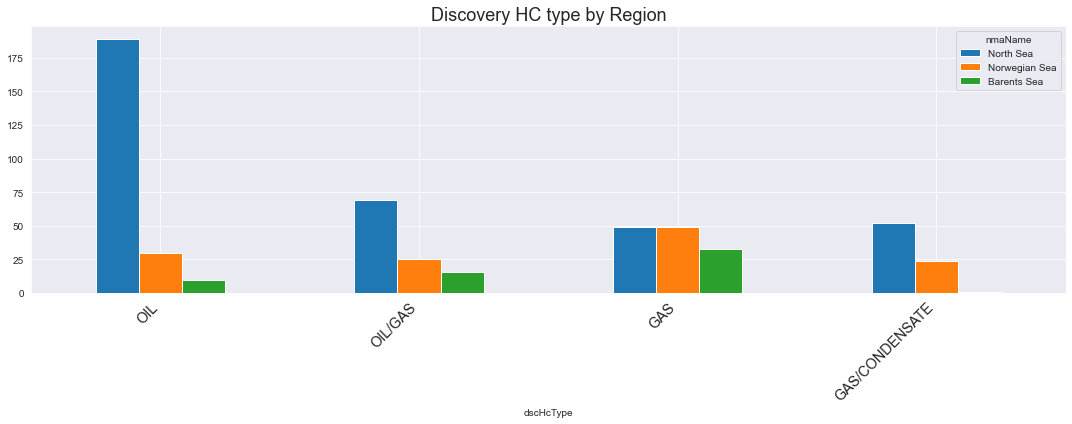

In [23]:
disc_areas.plot(kind='bar', figsize=(15,6), title='Discovery type by region')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discovery HC type by Region', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_results_type.png")
plt.show()

In [24]:
def absolute_value(val):
    a  = int(np.round(val/100.*(df.groupby('dscHcType').size()).sum(), 0))
    return a

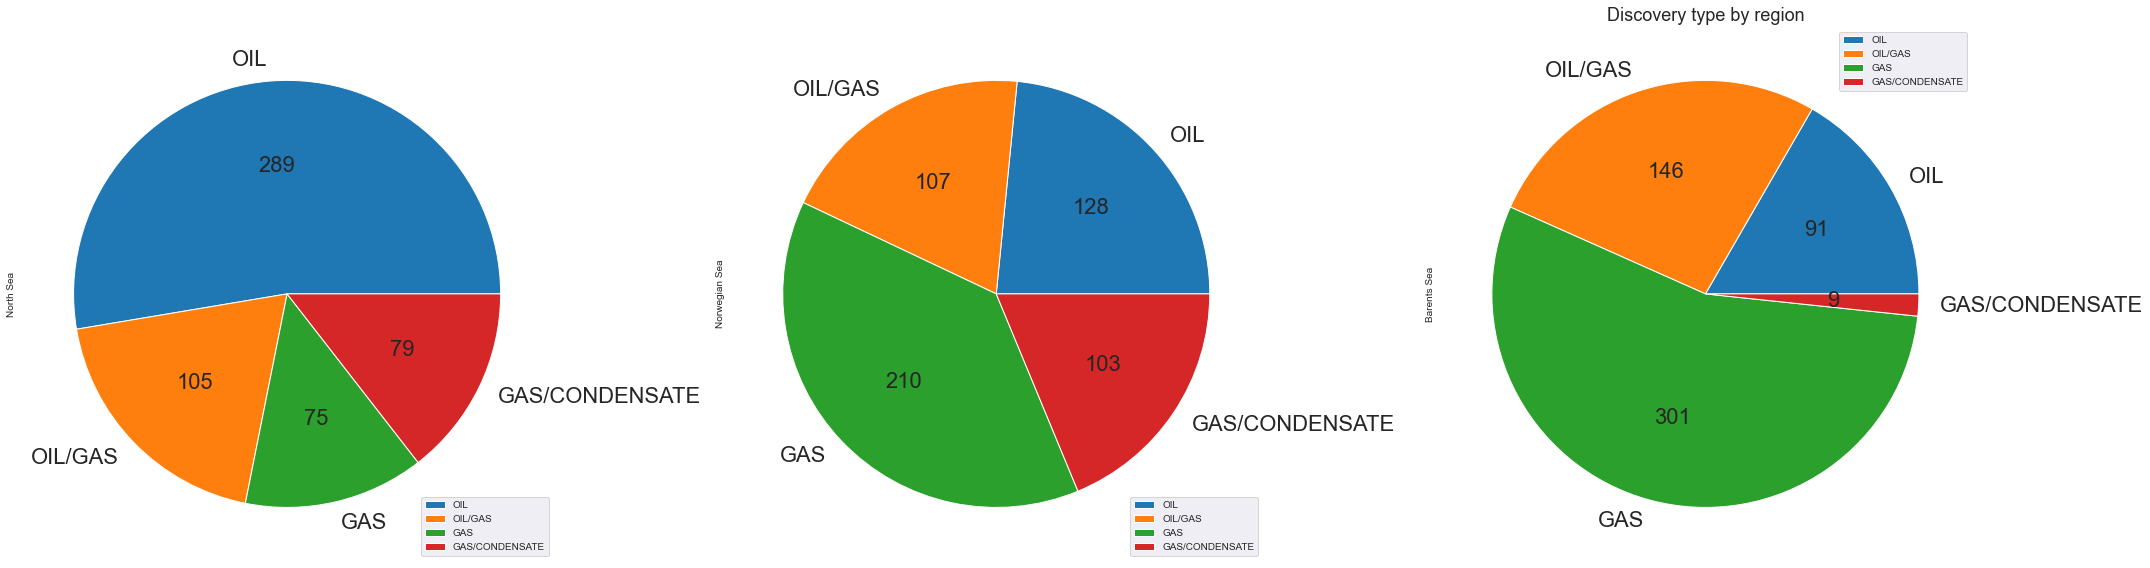

In [25]:
disc_areas.plot(kind='pie', subplots=True, figsize=(30,15), autopct=absolute_value, legend=True, textprops={'fontsize': 22})
plt.title('Discovery type by region', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_results_type_region.png")
plt.show()

# Discovery: Resources

In [26]:
link_key = 'disc_resources'
df = load(link_key)

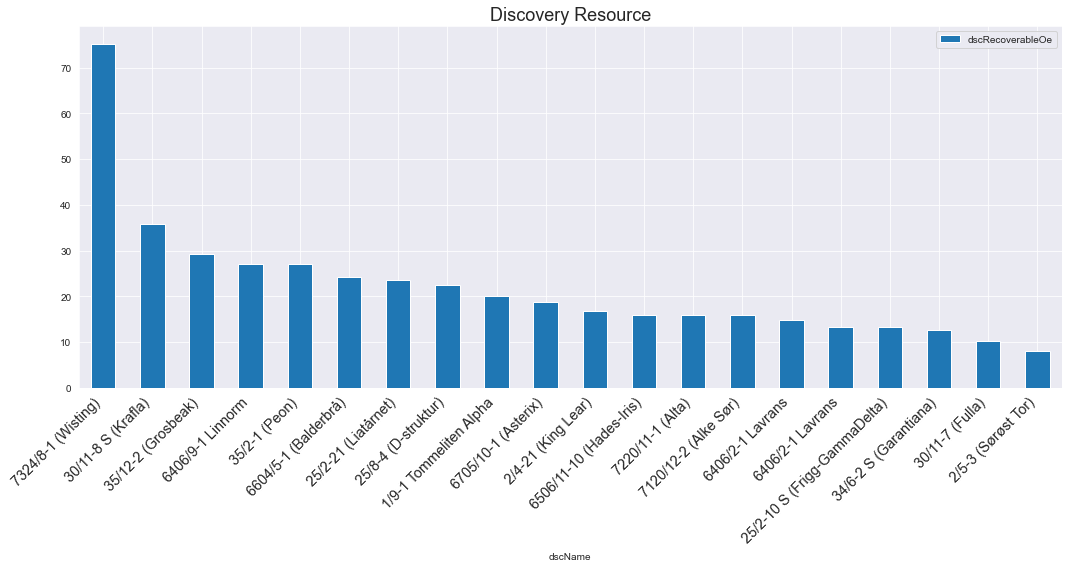

In [27]:
data = df.sort_values(by='dscRecoverableOe',ascending=False).head(20)
data.plot(kind='bar', x='dscName', y='dscRecoverableOe', figsize=(15,8), title='Discovery Resouce')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Discovery Resource', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/discovery_resources.png")
plt.show()

# Field: Overview

In [28]:
link_key = 'field_overview'
df = load(link_key)

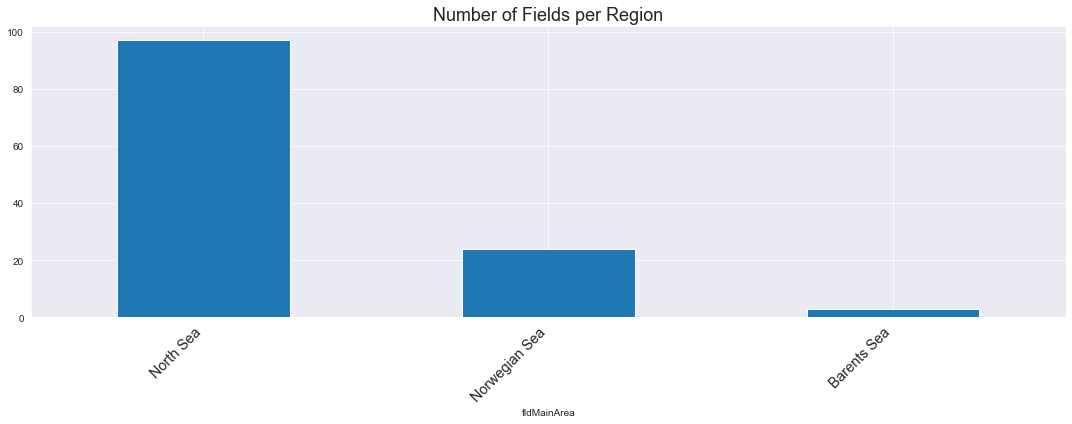

In [29]:
data = df.groupby('fldMainArea').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(15,6), title='Fields per region')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of Fields per Region', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_region.png")
plt.show()

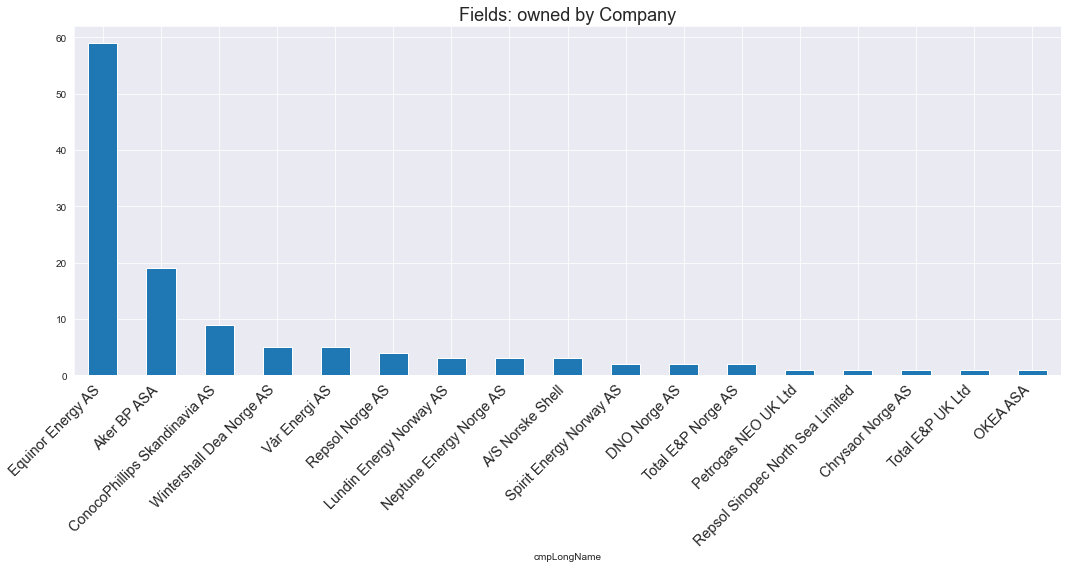

In [30]:
data = df.groupby('cmpLongName').size().sort_values(ascending=False)
data.plot(kind='bar', figsize=(15,8), title='Fields owned by Company')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Fields: owned by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_company.png")
plt.show()

In [31]:
field_areas = df.groupby(['cmpLongName', 'fldMainArea']).size().unstack()
field_areas = field_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]
data = field_areas.sort_values(by='North Sea', ascending=False)

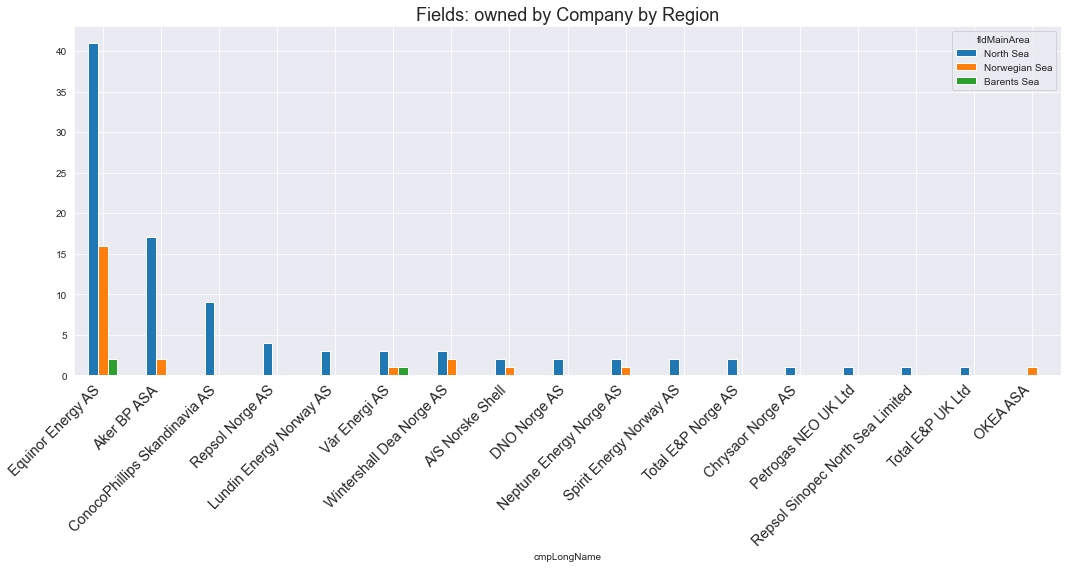

In [32]:
data.plot(kind='bar', figsize=(15,8), title='Fields owned by Company by region',)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Fields: owned by Company by Region', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_company_by_region.png")
plt.show()

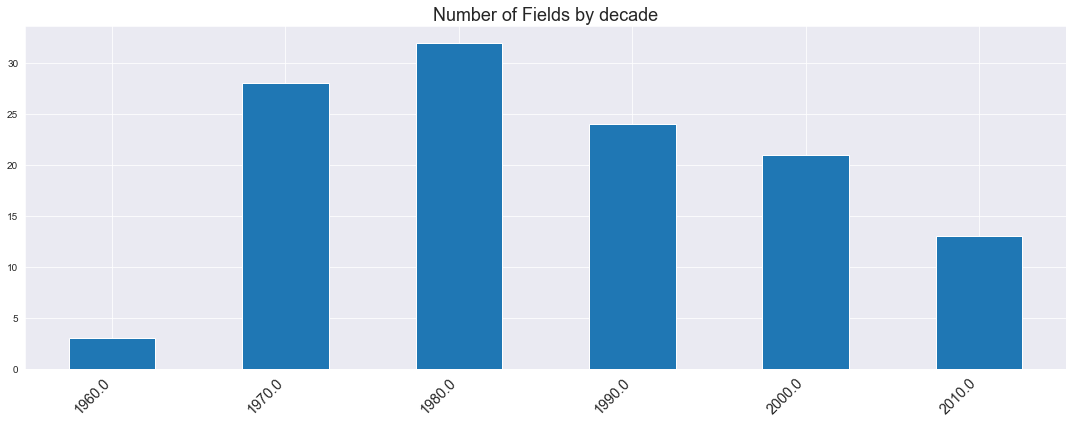

In [33]:
data = df.set_index('wlbCompletionDate').groupby(lambda x: (x.year//10)*10).count()['fldName']
data.plot(kind='bar', figsize=(15,6), title='Fields per decade',)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of Fields by decade', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/fields_by_decade.png")
plt.show()

# Stratigraphy: Wellbore

In [34]:
link_key = 'strat_wellbores'
df = load(link_key)
df = df.loc[df.groupby('wlbName').lsuTopDepth.idxmax(),:]
data = df.groupby('lsuName').count()['wlbName'].sort_values(ascending=False).head(10)

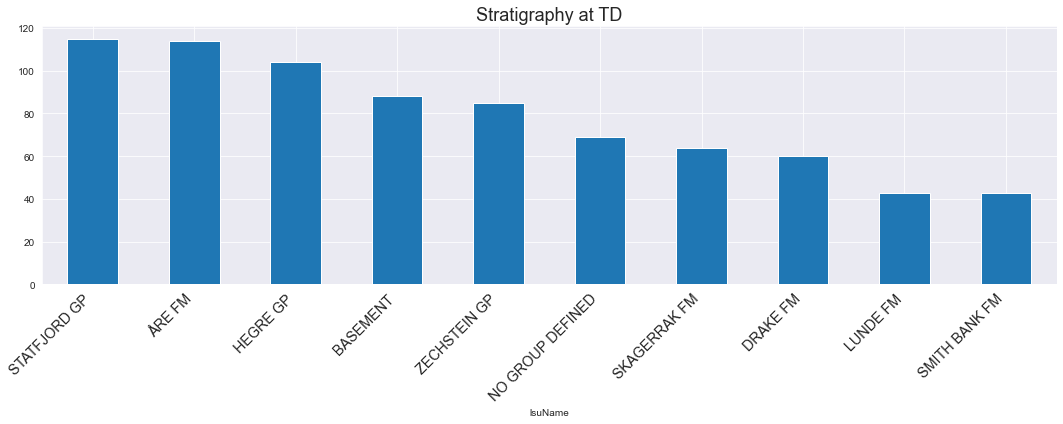

In [35]:
data.plot(kind='bar', figsize=(15,6),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Stratigraphy at TD', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/stratigraphy_by_TD.png")
plt.show()

# Stratigraphy: Cores

In [36]:
link_key = 'strat_cores'
df = load(link_key)

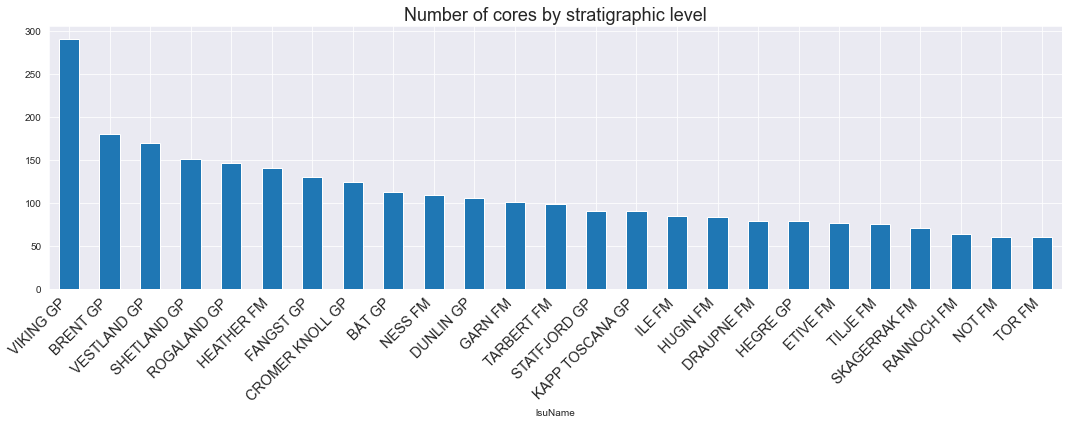

In [37]:
# Plot number of cores in each Formation / Group
data = df.groupby('lsuName').size().sort_values(ascending=False).head(25)
data.plot(kind='bar', figsize=(15,6),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Number of cores by stratigraphic level', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/core_by_formation.png")
plt.show()

# Company: Reserves

In [38]:
link_key = 'comp_reserves'
df = load(link_key)

In [39]:
df = df.groupby('cmpLongName').sum().sort_values(ascending=False, by='cmpRemainingOE')

In [40]:
# company_reserves = df['cmpRemainingOE'].sort_values(ascending=False).index
company_list = df['cmpRemainingOE'].index
print(f"Number of companies reporting Reserves: {len(company_list)}")

Number of companies reporting Reserves: 32


In [41]:
reserves_oe = df['cmpRemainingOE']

reserves = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)

data = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)

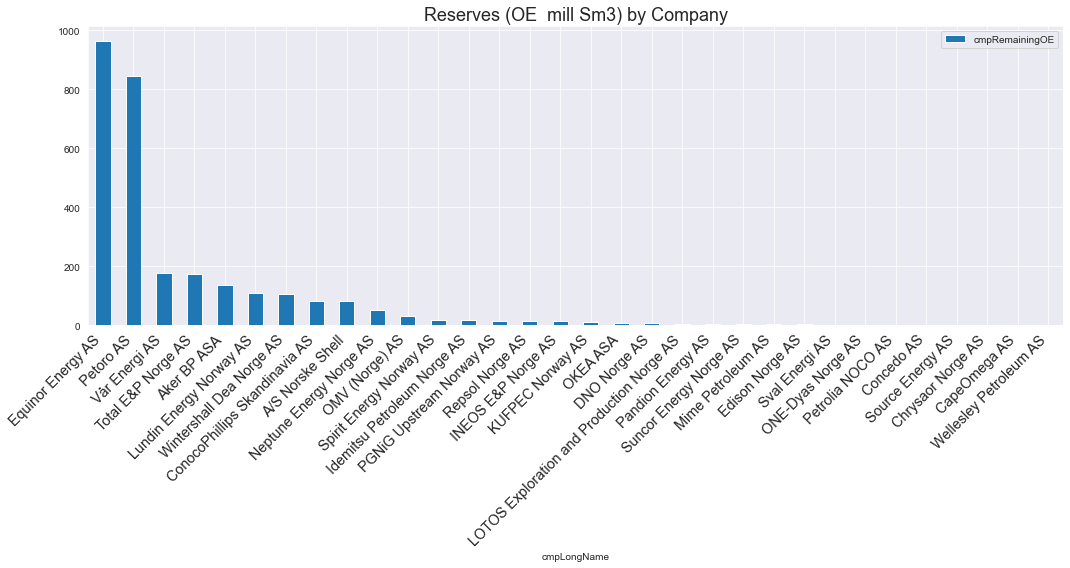

In [42]:
data.plot(kind='bar', x='cmpLongName', y='cmpRemainingOE', figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Reserves (OE  mill Sm3) by Company', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/reserves_by_company.png")
plt.show()

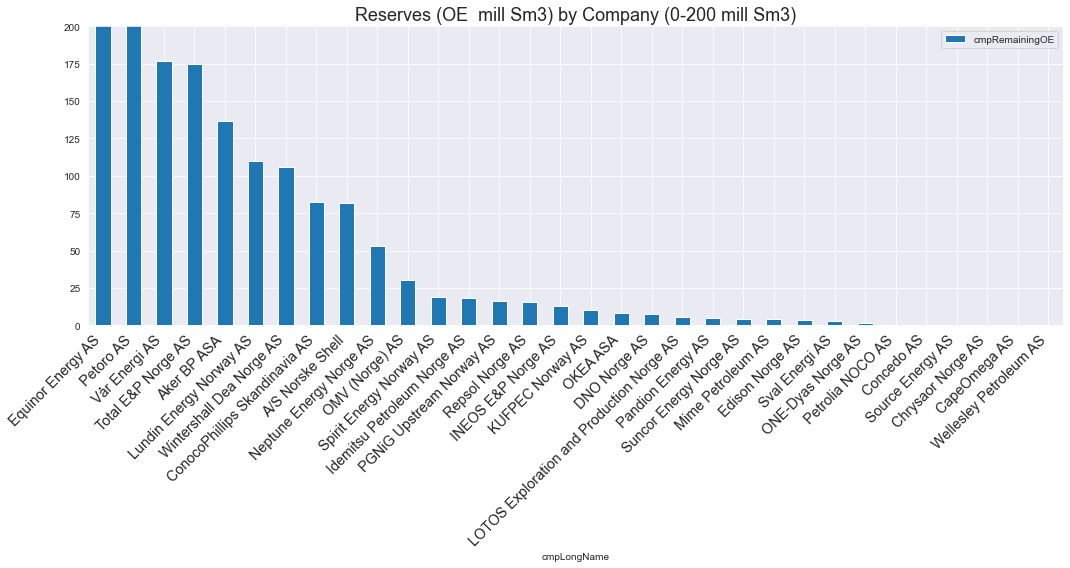

In [43]:
data.plot(kind='bar', x='cmpLongName', y='cmpRemainingOE', ylim = [0, 200], figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Reserves (OE  mill Sm3) by Company (0-200 mill Sm3)', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/reserves_by_company.png")
plt.show()

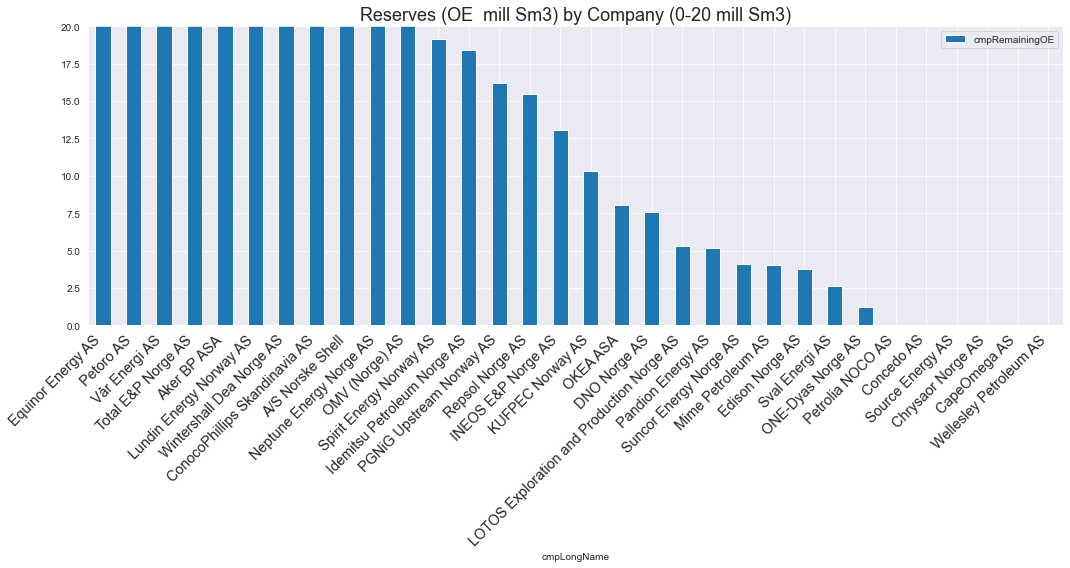

In [44]:
#data = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)
data.plot(kind='bar', x='cmpLongName', y='cmpRemainingOE', ylim = [0, 20], figsize=(15,8),)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large',)
plt.title('Reserves (OE  mill Sm3) by Company (0-20 mill Sm3)', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/reserves_by_company_zoom.png")
plt.show()

# Licences: Registered

In [45]:
link_key = 'lic_regLicensees'
df = load(link_key)

In [46]:
print(list(enumerate(company_list, start=1)))
select = 20 # int(input("Select company: "))

compare_list = []
if select == 1:
    compare_list.extend([company_list[select-1], company_list[select], company_list[select+1]])
elif select == len(reserves):
    compare_list.extend([company_list[select-1], company_list[select-2], company_list[select-3]])
else:
    compare_list.extend([company_list[select-1], company_list[select-2], company_list[select]])

[(1, 'Equinor Energy AS'), (2, 'Petoro AS'), (3, 'Vår Energi AS'), (4, 'Total E&P Norge AS'), (5, 'Aker BP ASA'), (6, 'Lundin Energy Norway AS'), (7, 'Wintershall Dea Norge AS'), (8, 'ConocoPhillips Skandinavia AS'), (9, 'A/S Norske Shell'), (10, 'Neptune Energy Norge AS'), (11, 'OMV (Norge) AS'), (12, 'Spirit Energy Norway AS'), (13, 'Idemitsu Petroleum Norge AS'), (14, 'PGNiG Upstream Norway AS'), (15, 'Repsol Norge AS'), (16, 'INEOS E&P Norge AS'), (17, 'KUFPEC Norway AS'), (18, 'OKEA ASA'), (19, 'DNO Norge AS'), (20, 'LOTOS Exploration and Production Norge AS'), (21, 'Pandion Energy AS'), (22, 'Suncor Energy Norge AS'), (23, 'Mime Petroleum AS'), (24, 'Edison Norge AS'), (25, 'Sval Energi AS'), (26, 'ONE-Dyas Norge AS'), (27, 'Petrolia NOCO AS'), (28, 'Concedo AS'), (29, 'Source Energy AS'), (30, 'Chrysaor Norge AS'), (31, 'CapeOmega AS'), (32, 'Wellesley Petroleum AS')]


In [47]:
partners_compare = {}

for company in compare_list:
    # filter for each company and sort by held interest in licence
    df_company = df[df['cmpLongName']==company].sort_values(by='ptlLicenseeInterest', ascending=False)
    
    # Number of licences held
    num_licences = len(df_company)
        
    # create a list of all licences for each company
    licences = list(df_company['ptlName'])
    licensees = pd.DataFrame()
    for licence in licences:
        # for each licence held by each company create df of all companies in the licence
        licensees = licensees.append(df[df['ptlName']==licence])
    
    # now create df of only partner companies
    
    partners = licensees[licensees['cmpLongName']!=company]
    partners = partners.groupby('cmpLongName').count().sort_values(by='ptlName', ascending=False)
    partners = partners['ptlName']
    partners = partners.sort_values(ascending=False)
    for partner in partners:
        partners_compare[company] = partners

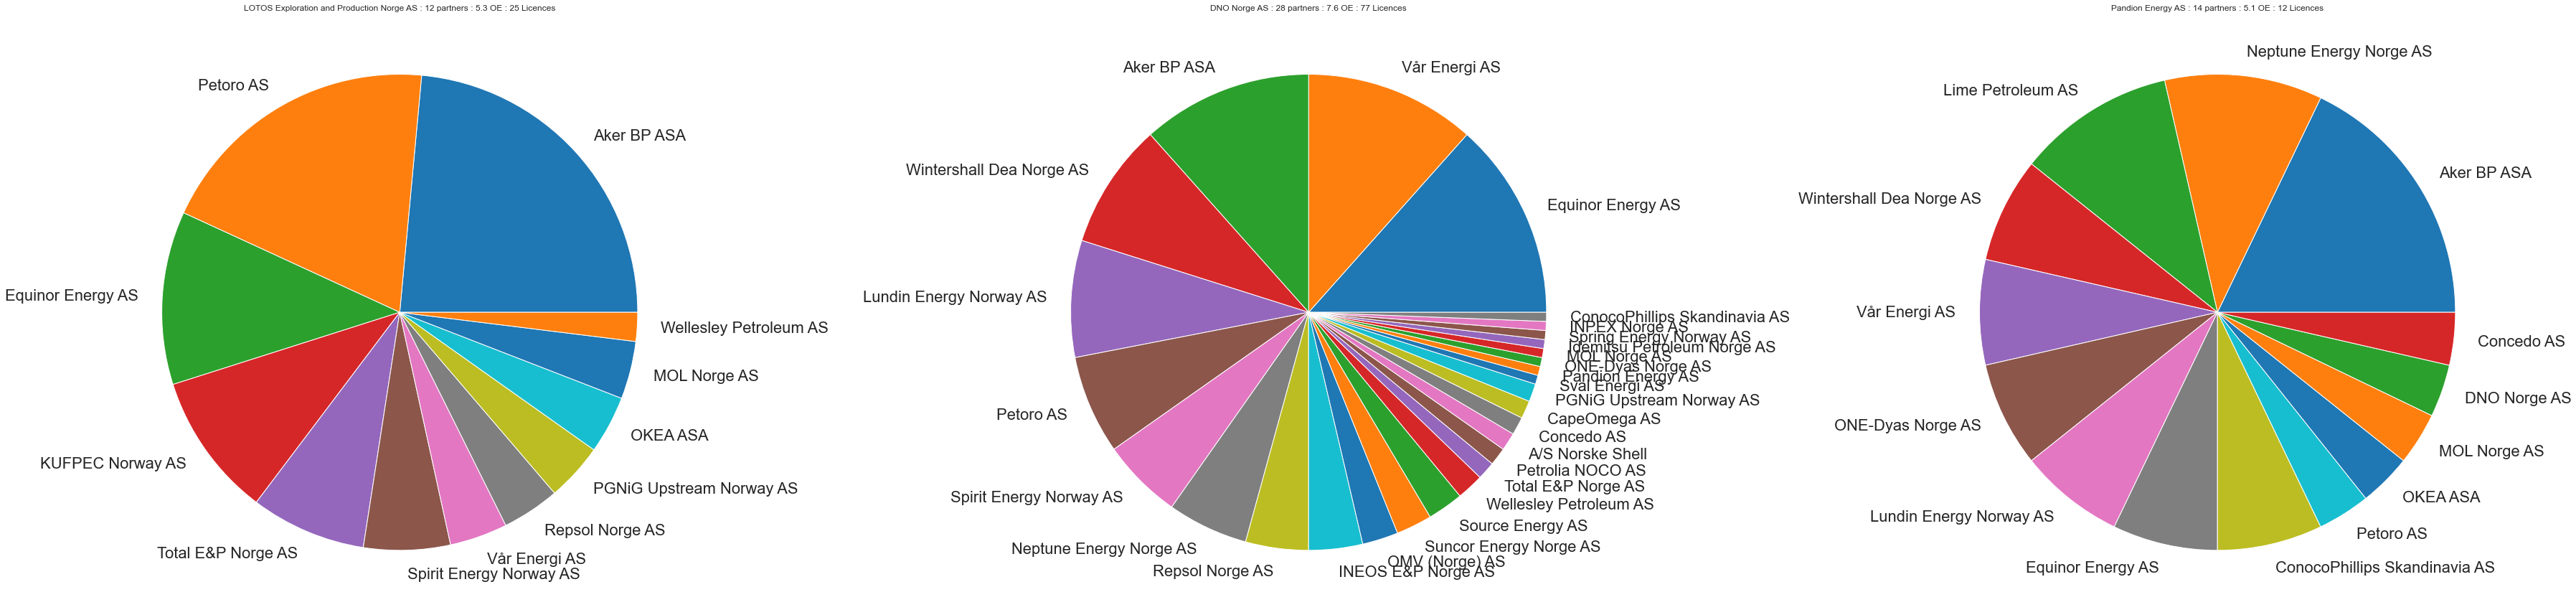

In [48]:
fig, ax = plt.subplots(1, len(list(partners_compare.keys())), figsize=(50,20))
for i in range(len(list(partners_compare.keys()))):    
    data = list(partners_compare.values())[i]
    ax[i].pie(data, labels=partners_compare[compare_list[i]].index, textprops={'fontsize': 22})    
    ax[i].set_title(f"{compare_list[i]} : {len(list(partners_compare.values())[i])} partners : {reserves_oe[list(partners_compare.keys())[i]]:.1f} OE : {df[df['cmpLongName']==compare_list[i]].shape[0]} Licences")

plt.tight_layout()
plt.savefig("./figures/company_partner_comparison_by_reserves.png")
plt.show()

# Licence: Operators

In [49]:
link_key = 'lic_operators'
df = load(link_key)

In [50]:
df[df['cmpLongName'] == 'LOTOS Exploration and Production Norge AS']

,prlName,prlOperDateValidFrom,prlOperDateValidTo,cmpLongName,prlNpdidLicence,cmpNpdidCompany,prlOperDateUpdated,DatesyncNPD
210,035 B,2014-01-16,2015-12-31,LOTOS Exploration and Production Norge AS,5105684,5064434,2019-10-02,2020-12-30
1895,362,2014-01-16,2015-12-06,LOTOS Exploration and Production Norge AS,3810565,5064434,2019-10-02,2020-12-30
2142,455,2011-07-01,2014-03-01,LOTOS Exploration and Production Norge AS,4909816,5064434,2019-10-02,2020-12-30
2243,498,2009-01-23,2015-01-23,LOTOS Exploration and Production Norge AS,5106134,5064434,2019-10-02,2020-12-30
2244,498 B,2014-02-07,2016-02-07,LOTOS Exploration and Production Norge AS,24214458,5064434,2019-10-02,2020-12-30
2256,503,2009-01-23,2015-11-07,LOTOS Exploration and Production Norge AS,5106405,5064434,2019-10-02,2020-12-30
2257,503 B,2011-02-04,2015-11-07,LOTOS Exploration and Production Norge AS,20107903,5064434,2019-10-02,2020-12-30
2258,503 C,2014-02-07,2015-10-07,LOTOS Exploration and Production Norge AS,24214483,5064434,2019-10-02,2020-12-30
2404,556,2010-02-19,2011-02-19,LOTOS Exploration and Production Norge AS,17654560,5064434,2019-10-02,2020-12-30
2865,797,2015-02-06,2017-02-06,LOTOS Exploration and Production Norge AS,25611033,5064434,2019-10-02,2020-12-30


# Licence: Work Obligations

In [51]:
link_key = 'lic_workObligs'
df = load(link_key)

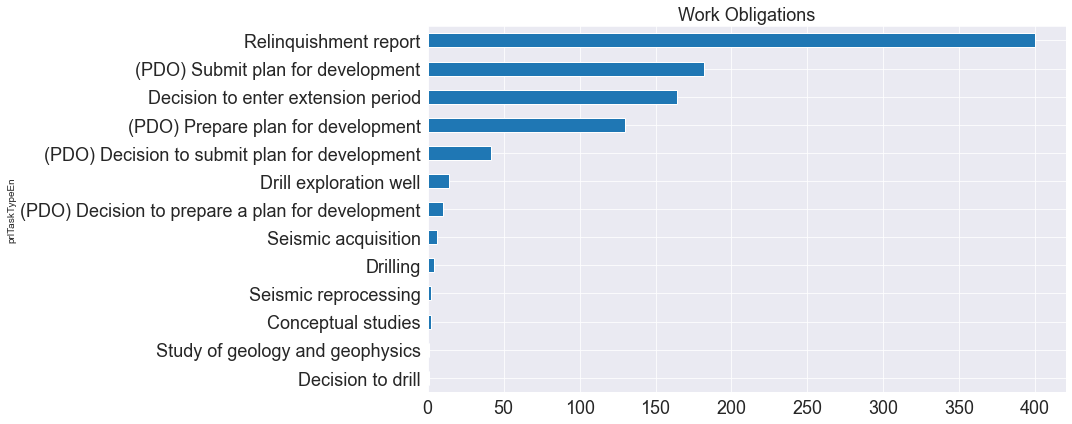

In [52]:
df = df.loc[df.groupby('prlName').prlTaskExpiryDate.idxmax(),:]

data = df.groupby('prlTaskTypeEn').size().sort_values()
data.plot(kind='barh', figsize=(15,6), fontsize=18)
plt.title('Work Obligations', fontsize=18)
plt.tight_layout()
plt.savefig("./figures/work_obligations.png")
plt.show()

# The End

# links to npd.no csv exports
company_reserves = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/company_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_regLicensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_petreg_licence_licencee&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_operators = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_oper_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_workobligations = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_task&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
baa_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/bsns_arr_area_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_inplacevolumes = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_in_place_volumes&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_wellbores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_cores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore_core&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_explorationcurrent = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_current_year&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_exploration10years = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_last_10_years&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_alllong = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_resources = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
